# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

In [1]:
import time
started_at = time.time()
print started_at

1549328517.17


## Condições do experimento

* Quantidade limitada de arestas
* Todas as features
* Quantidade variável de n_estimators

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [2]:
max_edges = 160000 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"
n_estimators = 20
features = 'all'

In [3]:
# Parameters
n_estimators = 10
max_edges = 10000
features = "all"


## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [4]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [5]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 10000 edges out of 229338 available (4.36% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [6]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [7]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [8]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [9]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [10]:
if features == 'all':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'degree',
        'eigenvector_centrality',
        'betweenness_centrality',
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]
    
elif features == 'all_except_network_metrics':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]

elif features == 'none':
    
    categorical_features = []

    numeric_features = []

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [11]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [12]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [13]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,1887.000000,1887,1887,1887,1872,1874,0.0,273,1662,1637,1637,1365,814,461,117,9,0.0,0.0,0.0,1876,1876,1876,1887.0,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1.887000e+03,1.887000e+03,1887.000000,1887.000000
unique,NaN,1840,1887,1466,7,288,NaN,243,1,1,23,112,185,120,42,5,NaN,NaN,NaN,1876,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Macroeconomia,https://www.amazon.com.br/dp/0198769865/,Ian Stewart (Autor),Capa comum,Companhia das Letras,NaN,17 de outubro de 2017,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Faculdade,Probabilidade e Estatística,Abstrata,NaN,NaN,NaN,8521631030,978-8590200215,Português,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,1,12,1508,98,NaN,3,1662,1637,399,283,136,41,14,3,NaN,NaN,NaN,1,1,1263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1643.043985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,148.906746,58197.556473,412.825546,13.727257,4.481211,15.993920,22.953013,2.305302,467.427140,2.108380e+09,8.119221e-03,9.182830,0.003917
std,1817.245542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,266.318411,74967.622490,269.695568,34.297497,0.496588,2.877004,2.804110,1.213144,209.671432,1.228140e+09,2.103019e-02,18.597254,0.011722
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.900000,7.000000,4.000000,1.000000,1.000000,2.600000,14.000000,0.200000,18.100000,9.916600e+05,8.902568e-08,1.000000,0.000000
25%,509.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,35.900000,11609.000000,232.000000,3.000000,4.484431,14.000000,21.000000,1.400000,340.000000,1.036745e+09,7.787527e-06,1.000000,0.000000
50%,1218.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,56.900000,36009.000000,352.000000,13.782918,4.484431,15.600000,22.900000,2.000000,470.363783,2.092333e+09,6.130131e-05,2.000000,0.000465
75%,1907.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,129.090000,60184.500000,528.000000,13.782918,4.700000,17.200000,24.100000,2.900000,581.000000,3.143779e+09,2.193281e-03,8.000000,0.003073


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [14]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.000000,4.000000,14.0,21.0,0.6,181.0,3564330554,0.014272,19,0.011168
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.000000,4.600000,14.6,21.0,1.9,363.0,1309098117,0.060501,62,0.005720
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,13.782918,4.484431,14.4,20.8,0.8,200.0,1260550007,0.041809,59,0.013263
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.000000,4.500000,13.7,21.5,1.6,381.0,4012708477,0.013503,18,0.005989
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.000000,4.500000,13.8,21.8,4.0,939.0,3891707921,0.084038,88,0.036443
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.000000,5.000000,13.8,21.5,2.2,581.0,2030201243,0.051176,43,0.013932
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,13.782918,4.484431,13.7,21.5,0.8,159.0,744636978,0.010229,9,0.000780
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.000000,5.000000,13.8,21.6,1.0,159.0,425205287,0.005257,10,0.013941
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,13.782918,4.484431,13.6,20.3,2.3,522.0,1246026773,0.022270,23,0.003884
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa comum,Dover Publications,NaN,NaN,Liv

## Random forest using various features, price as target

### Preparing data

In [15]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['degree', 'eigenvector_centrality', 'betweenness_centrality', 'ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price
Test percentage:  0.199788023317
Train features shape:  (1510, 2253)
Train target shape:  (1510,)
Test features shape:  (377, 2253)
Test target shape:  (377,)


### Average price and median price as baselines

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [16]:
average_target = np.average(target)
median_target = np.median(target)
print "Average price: R$", average_target
print "Median parice; R$", median_target

Average price: R$ 147.2979668874172
Median parice; R$ 57.504999999999995


### Cross val

#### Run cross val

In [17]:
estimators, splits, scores = shared_functions.run_cross_validation_regression(features, target, n_estimators)

#### Cross val score

In [18]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.40336529046079467
RF relative abs std:  0.045017052833412896
Baseline (average) relative mean:  2.31638625459937
Baseline (average) relative std:  0.1608502007989101
Baseline (median) relative mean:  0.7416738249870496
Baseline (median) relative std:  0.052038774490682484
=== Absolute
RF abs mean:  59.36154503311259
RF abs std:  12.970924358197585
Baseline (average) mean:  143.78918272882768
Baseline (average) std:  19.19315787884527
Baseline (median) mean:  112.24861589403972
Baseline (median) std:  20.173348351445892


####  List of most important features

In [19]:
shared_functions.get_most_important_features(estimators, feature_list)

,feature,mean importance,std,std/mean
0,coverType_Capa dura,25.029125,1.259425,0.050318
1,eigenvector_centrality,11.141654,2.662122,0.238934
2,pages,10.575864,2.312246,0.218634
3,width,6.086179,1.554092,0.255348
4,publisher_McGraw-Hill Science/Engineering/Math,5.685325,2.638413,0.464074
5,publisher_Cengage Learning,5.328607,2.937017,0.551179
6,betweenness_centrality,4.049820,1.402632,0.346344
7,ranking,3.370069,2.226528,0.660677
8,height,2.972808,0.782093,0.263082
9,degree,1.674651,0.893002,0.533247


### Predicted price vs real price

Splits quantity:  10
Splits lenghts:  [151, 151, 151, 151, 151, 151, 151, 151, 151, 151]
X shape:  (1510, 2253)
y shape:  (1510,)


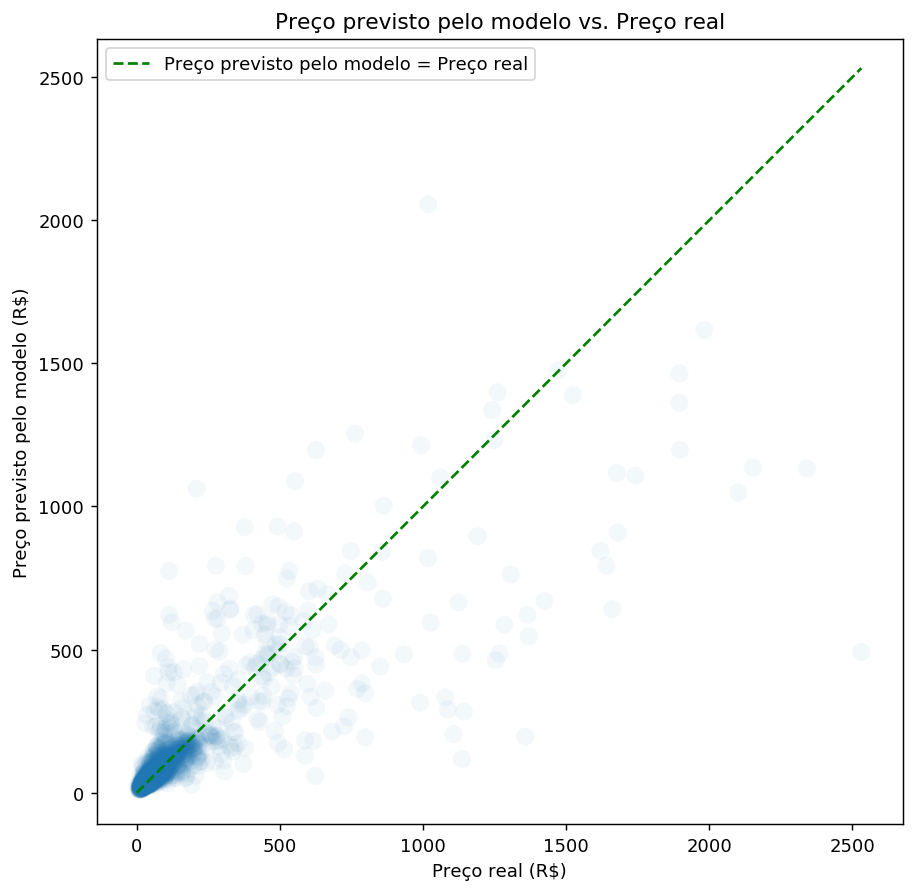

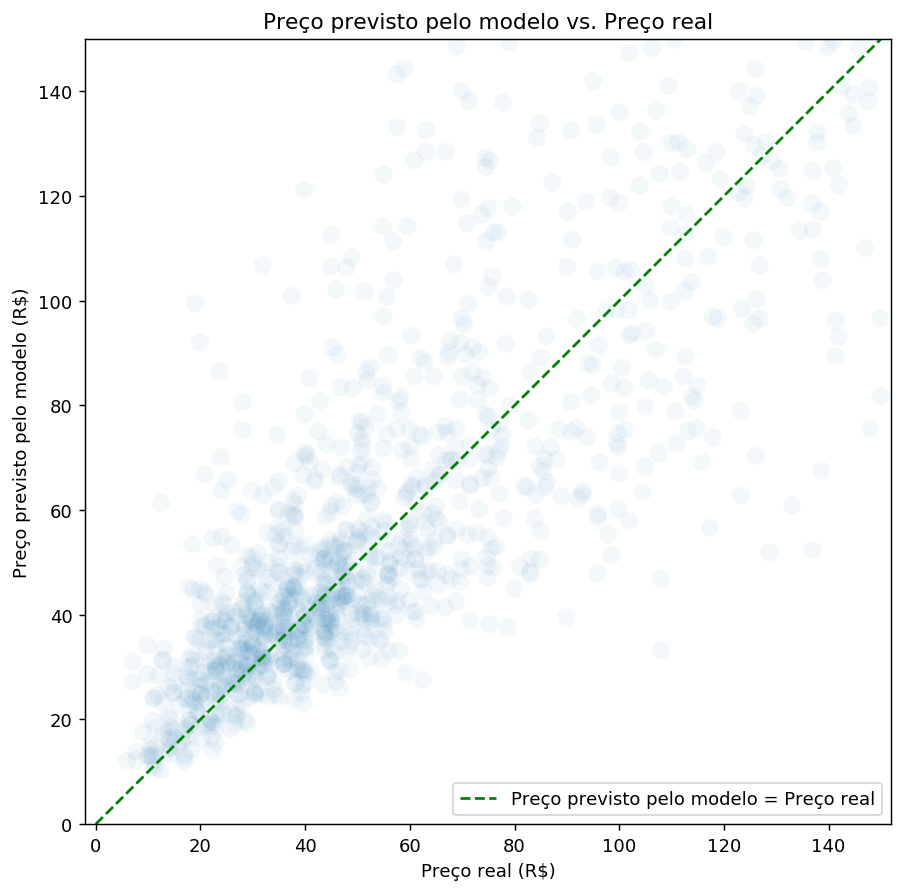

In [20]:
y_pred = shared_functions.get_all_predictions_from_splits(features, target, splits, estimators)                                                  
shared_functions.plot_splits_predicted_vs_real(target, y_pred, title=u'Preço previsto pelo modelo vs. Preço real', xlabel=u'Preço real (R$)', ylabel=u'Preço previsto pelo modelo (R$)', legend=u'Preço previsto pelo modelo = Preço real', zoomY = 150)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [21]:
errors, errors_baseline, errors_relative, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative = shared_functions.print_mean_absolute_error(y_pred, target, average_target, median_target)

== Absolute
('Mean absolute prediction error: R$', 59.36)
('Std prediction error: R$', 145.12)
('Mean absolute error using average: R$', 143.79)
('Std prediction error using average: R$', 224.78)
('Mean absolute error using median: R$', 112.25)
('Std prediction error using median: R$', 258.2)
== Relative
('Mean relative absolute prediction error: ', 0.4)
('Std relative prediction error: ', 0.61)
('Mean relative absolute error using average: ', 2.32)
('Std relative prediction error using average: ', 2.56)
('Mean absolute error using median: R$', 0.74)
('Std prediction error using median: R$', 0.8)


### Join data

In [22]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, features, target, y_pred, errors, errors_relative, errors_baseline, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [23]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.565469e+08,"[456546893.0, 13.0, 0.0249982911487, 0.0023864...",2038.893,2383.772033,2473.565,0.977280,0.941804,0.805546,492.177,2531.07,1685,Complex Analysis Complex Analysis Complex Anal...,https://www.amazon.com.br/dp/0070006571/,"Lars V. Ahlfors (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070006571,978-0070006577,Inglês,1,2531.07,59185.844728,345.000000,13.782918,4.484431,16.000000,23.100000,2.50000,470.363783,0.024998,13,0.002386
1.731114e+09,"[1731113829.0, 13.0, 0.0296845571371, 0.001456...",1207.820,2193.902033,2283.695,0.975438,0.937084,0.515898,1133.380,2341.20,1779,Modern Physics for Scientists and Engineers,https://www.amazon.com.br/dp/1133103723/,"Stephen T. Thornton (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1133103723,978-1133103721,Inglês,1,2341.20,59185.844728,688.000000,13.782918,4.484431,20.300000,25.400000,3.20000,470.363783,0.029685,13,0.001457
1.993779e+09,"[1993779221.0, 24.0, 0.0344875756862, 0.004301...",1161.071,1209.702033,1299.495,0.957623,0.891453,0.855616,195.929,1357.00,1716,A VULVA 2 Ed 2003,https://www.amazon.com.br/dp/8126532289/,S. M. Neill C. M. Ridley (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8126532289,978-8126532285,Inglês,1,1357.00,59185.844728,420.386983,13.782918,4.484431,16.101266,23.044557,2.33357,470.363783,0.034488,24,0.004302
1.144179e+09,"[1144179495.0, 4.0, 0.00424156049248, 0.000886...",1053.185,1954.242033,2044.035,0.972637,0.929910,0.501149,1048.355,2101.54,1991,Machine Learning,https://www.amazon.com.br/dp/0070428077/,"Tom M. Mitchell (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070428077,978-0070428072,Inglês,1,2101.54,59185.844728,432.000000,13.782918,4.484431,16.800000,24.100000,3.30000,921.000000,0.004242,4,0.000887
8.188651e+07,"[81886513.0, 20.0, 0.0317608854158, 0.00280202...",1037.780,870.422033,960.215,0.943496,0.855267,1.019711,2055.500,1017.72,1719,Real and Complex Analysis,https://www.amazon.com.br/dp/0070542341/,"Walter Rudin (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,0070542341,978-0070542341,Inglês,1,1017.72,409809.000000,430.000000,13.782918,4.484431,17.300000,24.100000,2.00000,780.000000,0.031761,20,0.002802
1.895458e+09,"[1895458154.0, 9.0, 0.0158713811553, 0.0012396...",1020.001,1514.182033,1603.975,0.965389,0.911345,0.613911,641.479,1661.48,1897,A Transition to Advanced Mathematics,https://www.amazon.com.br/dp/1285463269/,"Douglas Smith (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285463269,978-1285463261,Inglês,1,1661.48,59185.844728,448.000000,13.782918,4.484431,19.000000,23.500000,1.90000,748.000000,0.015871,9,0.001240
1.088718e+09,"[1088718135.0, 32.0, 0.0421584506269, 0.004805...",1018.759,988.982033,1078.775,0.949392,0.870368,0.896574,117.521,1136.28,1830,Geometric Algebra,https://www.amazon.com.br/dp/0471608394/,E. Artin (Autor),Capa comum,Wiley-Blackwell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0471608394,978-0471608394,Inglês,1,1136.28,59185.844728,224.000000,13.782918,4.484431,14.700000,22.900000,1.20000,308.000000,0.042158,32,0.004805
7.945218e+08,"[794521798.0, 1.0, 0.00128028521964, 0.0, 5918...",1017.052,2004.872033,2094.665,0.973280,0.931558,0.4

### Worst relative predictions

In [24]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.429830e+09,"[2429829614.0, 7.0, 0.0155343579693, 0.0009425...",213.366,117.437967,27.645,0.925820,3.932953,7.145546,243.226,29.86,2170,How to Memorize Formulas in Mathematics: Book-...,https://www.amazon.com.br/dp/1973255464/,Rajesh Sarswat (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,29.86,59185.844728,420.386983,13.782918,4.484431,16.101266,23.044557,2.33357,470.363783,0.015534,7,0.000943
2.576533e+09,"[2576533146.0, 1.0, 3.14715923438e-05, 0.0, 33...",236.106,112.307967,22.515,0.643470,3.209716,6.747814,271.096,34.99,2862,Explica Tudo. Coisas Difíceis em Palavras Fáceis,https://www.amazon.com.br/dp/8535929533/,Randall Munroe (Autor),Capa dura,Companhia das Letras,NaN,NaN,Livros,Livros,Ciências,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535929533,978-8535929539,Português,1,34.99,331.000000,68.000000,2.000000,4.000000,23.400000,33.600000,1.20000,680.000000,0.000031,1,0.000000
1.641909e+09,"[1641909461.0, 1.0, 0.00167329678758, 0.0, 591...",661.640,34.347967,55.445,0.490881,0.304099,5.857813,774.590,112.95,1764,The Ashtray: (Or the Man Who Denied Reality),https://www.amazon.com.br/dp/0226922685/,Errol Morris (Autor),Capa dura,University of Chicago Press,NaN,16 de maio de 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0226922685,978-0226922683,Inglês,1,112.95,59185.844728,192.000000,13.782918,4.484431,20.300000,25.400000,2.00000,470.363783,0.001673,1,0.000000
3.111996e+09,"[3111995652.0, 1.0, 0.00158936799228, 0.0, 118...",347.977,86.897967,2.895,0.047930,1.438708,5.761209,408.377,60.40,1684,Sapiens: A Brief History of Humankind,https://www.amazon.com.br/dp/0062316095/,Yuval Noah Harari (Autor),Capa dura,Harper,NaN,10 de fevereiro de 2015,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Ciências Biológicas,Evolução,NaN,NaN,NaN,NaN,NaN,0062316095,978-0062316097,Inglês,1,60.40,1183.000000,464.000000,44.000000,4.600000,16.300000,22.600000,4.30000,470.363783,0.001589,1,0.000000
2.609321e+09,"[2609321234.0, 43.0, 0.000987008579015, 0.0260...",259.902,101.797967,12.005,0.263846,2.237318,5.712132,305.402,45.50,221,A Origem das Espécies,https://www.amazon.com.br/dp/8572329854/,"Charles Darwin (Autor),",Capa dura,Martin Claret,NaN,NaN,Livros,Livros,Ciências,Ciências Biológicas,Evolução,NaN,NaN,NaN,NaN,NaN,NaN,8572329854,978-8572329859,Português,1,45.50,1507.000000,574.000000,43.000000,4.700000,17.200000,24.000000,3.80000,962.000000,0.000987,43,0.026008
1.487078e+08,"[148707819.0, 10.0, 0.0222805394459, 0.0022116...",405.071,63.857967,25.935,0.310822,0.765316,4.854638,488.511,83.44,2252,Maker of Patterns – An Autobiography Through L...,https://www.amazon.com.br/dp/0871403862/,Freeman Dyson (Autor),Capa dura,Liveright,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0871403862,978-0871403865,Inglês,1,83.44,198305.000000,416.000000,1.000000,5.000000,16.800000,24.400000,3.60000,739.000000,0.022281,10,0.002212
1.623173e+09,"[1623172789.0, 6.0, 0.00854170030253, 0.001432...",508.386,34.127967,55.665,0.491871,0.301564,4.492233,621.556,113.17,2231,The Tangled Tree: A Radical New History of Life,https://www.amazon.com.br/dp/1476776628/,David Quammen (Autor),Capa dura,Simon & Schuster,NaN,14 de agosto de 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1476776628,978-1476776620,Inglês,1,113.17,59185.844728,480.000000,13.782918,4.484431,15.200000,22.900000,3.80000,712.000000,0.008542,6,0.001433
1.123179e+09,"[1123179230.0, 8.0, 0.000219834640277, 0.002

### Best absolute predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7.547973e+08,"[754797334.0, 2.0, 0.000296874467492, 0.001072...",0.014,105.197967,15.405,0.365914,2.498764,0.000333,42.114,42.10,634,Marco Aurélio. O Imperador Filósofo,https://www.amazon.com.br/dp/8537817511/,"Pierre Grimal (Autor),",Capa comum,Zahar,NaN,NaN,Livros,Livros,Biografias e Histórias Reais,Históricas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8537817511,978-8537817513,Português,1,42.10,1179.0,376.0,13.782918,4.484431,16.2,23.0,2.2,581.0,0.000297,2,0.001072
6.205927e+08,"[620592679.0, 2.0, 6.15731192644e-05, 0.000495...",0.039,103.717967,13.925,0.319527,2.379944,0.000895,43.541,43.58,1317,O Livro da Ciência,https://www.amazon.com.br/dp/8525062480/,Vários Autores (Autor),Capa dura,Globo,NaN,NaN,Livros,Livros,"Educação, Referência e Didáticos",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8525062480,978-8525062482,Português,1,43.58,20788.0,352.0,22.000000,4.300000,16.6,20.4,2.4,862.0,0.000062,2,0.000495
2.595441e+08,"[259544073.0, 3.0, 6.31313076235e-05, 0.000534...",0.041,115.397967,25.605,0.802665,3.617491,0.001285,31.941,31.90,396,O Médico Quântico,https://www.amazon.com.br/dp/8531609410/,Amit Goswami (Autor),Capa comum,Cultrix,NaN,NaN,Livros,Livros,Saúde e Família,Medicina Alternativa,Holística,NaN,NaN,NaN,NaN,NaN,NaN,8531609410,978-8531609411,Português,1,31.90,18206.0,288.0,2.000000,5.000000,15.8,22.6,1.4,422.0,0.000063,3,0.000535
1.944581e+09,"[1944581112.0, 1.0, 5.23207748418e-05, 0.0, 15...",0.043,86.197967,3.595,0.058838,1.410769,0.000704,61.143,61.10,3090,Uma História Cultural da Rússia,https://www.amazon.com.br/dp/8501400769/,"Orlando Figes (Autor),",Capa comum,Record,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8501400769,978-8501400765,Português,1,61.10,1503.0,882.0,6.000000,4.100000,15.2,22.8,5.0,998.0,0.000052,1,0.000000
1.397016e+09,"[1397015569.0, 4.0, 0.000390774375878, 0.01305...",0.098,112.247967,22.455,0.640656,3.202510,0.002796,35.148,35.05,499,A Vida Secreta da Mente,https://www.amazon.com.br/dp/8547000437/,Mariano Sigman (Autor),Capa comum,Objetiva,NaN,NaN,Livros,Livros,Autoajuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8547000437,978-8547000431,Português,1,35.05,6092.0,288.0,1.000000,4.000000,13.4,20.8,2.2,358.0,0.000391,4,0.013051
4.225830e+09,"[4225829870.0, 3.0, 2.32146273671e-05, 0.00128...",0.113,103.397967,13.605,0.309909,2.355307,0.002574,44.013,43.90,972,Do Céu,https://www.amazon.com.br/dp/8572837604/,Aristoteles (Autor),Capa comum,Edipro,NaN,NaN,Livros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8572837604,978-8572837606,Português,1,43.90,67950.0,208.0,13.782918,4.484431,13.6,20.8,1.2,281.0,0.000023,3,0.001283
7.446370e+08,"[744636978.0, 9.0, 0.010229457522, 0.000780045...",0.122,111.197967,21.405,0.592936,3.080276,0.003380,35.978,36.10,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,13.782918,4.484431,13.7,21.5,0.8,159.0,0.010229,9,0.000780
3.205397e+08,"[320539701.0, 10.0, 0.00073515946438, 0.008037...",0.124,107.797967,18.005,0.455823,2.729062,0.003139,39.376,39.50,382,A Ciência da Sorte. A Matemática e o Mundo das...,https://www.amazon.com.br/dp/8537816922/,"Adam Kucharski (Autor),",Capa comum,Zahar,NaN,NaN,Livros,Livros,Ciências,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,NaN,8537816922,978

### Best relative predictions

In [26]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7.547973e+08,"[754797334.0, 2.0, 0.000296874467492, 0.001072...",0.014,105.197967,15.405,0.365914,2.498764,0.000333,42.114,42.10,634,Marco Aurélio. O Imperador Filósofo,https://www.amazon.com.br/dp/8537817511/,"Pierre Grimal (Autor),",Capa comum,Zahar,NaN,NaN,Livros,Livros,Biografias e Histórias Reais,Históricas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8537817511,978-8537817513,Português,1,42.10,1179.0,376.0,13.782918,4.484431,16.2,23.0,2.2,581.0,0.000297,2,0.001072
6.205927e+08,"[620592679.0, 2.0, 6.15731192644e-05, 0.000495...",0.039,103.717967,13.925,0.319527,2.379944,0.000895,43.541,43.58,1317,O Livro da Ciência,https://www.amazon.com.br/dp/8525062480/,Vários Autores (Autor),Capa dura,Globo,NaN,NaN,Livros,Livros,"Educação, Referência e Didáticos",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8525062480,978-8525062482,Português,1,43.58,20788.0,352.0,22.000000,4.300000,16.6,20.4,2.4,862.0,0.000062,2,0.000495
2.595441e+08,"[259544073.0, 3.0, 6.31313076235e-05, 0.000534...",0.041,115.397967,25.605,0.802665,3.617491,0.001285,31.941,31.90,396,O Médico Quântico,https://www.amazon.com.br/dp/8531609410/,Amit Goswami (Autor),Capa comum,Cultrix,NaN,NaN,Livros,Livros,Saúde e Família,Medicina Alternativa,Holística,NaN,NaN,NaN,NaN,NaN,NaN,8531609410,978-8531609411,Português,1,31.90,18206.0,288.0,2.000000,5.000000,15.8,22.6,1.4,422.0,0.000063,3,0.000535
1.944581e+09,"[1944581112.0, 1.0, 5.23207748418e-05, 0.0, 15...",0.043,86.197967,3.595,0.058838,1.410769,0.000704,61.143,61.10,3090,Uma História Cultural da Rússia,https://www.amazon.com.br/dp/8501400769/,"Orlando Figes (Autor),",Capa comum,Record,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8501400769,978-8501400765,Português,1,61.10,1503.0,882.0,6.000000,4.100000,15.2,22.8,5.0,998.0,0.000052,1,0.000000
1.397016e+09,"[1397015569.0, 4.0, 0.000390774375878, 0.01305...",0.098,112.247967,22.455,0.640656,3.202510,0.002796,35.148,35.05,499,A Vida Secreta da Mente,https://www.amazon.com.br/dp/8547000437/,Mariano Sigman (Autor),Capa comum,Objetiva,NaN,NaN,Livros,Livros,Autoajuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8547000437,978-8547000431,Português,1,35.05,6092.0,288.0,1.000000,4.000000,13.4,20.8,2.2,358.0,0.000391,4,0.013051
4.225830e+09,"[4225829870.0, 3.0, 2.32146273671e-05, 0.00128...",0.113,103.397967,13.605,0.309909,2.355307,0.002574,44.013,43.90,972,Do Céu,https://www.amazon.com.br/dp/8572837604/,Aristoteles (Autor),Capa comum,Edipro,NaN,NaN,Livros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8572837604,978-8572837606,Português,1,43.90,67950.0,208.0,13.782918,4.484431,13.6,20.8,1.2,281.0,0.000023,3,0.001283
7.446370e+08,"[744636978.0, 9.0, 0.010229457522, 0.000780045...",0.122,111.197967,21.405,0.592936,3.080276,0.003380,35.978,36.10,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,13.782918,4.484431,13.7,21.5,0.8,159.0,0.010229,9,0.000780
3.205397e+08,"[320539701.0, 10.0, 0.00073515946438, 0.008037...",0.124,107.797967,18.005,0.455823,2.729062,0.003139,39.376,39.50,382,A Ciência da Sorte. A Matemática e o Mundo das...,https://www.amazon.com.br/dp/8537816922/,"Adam Kucharski (Autor),",Capa comum,Zahar,NaN,NaN,Livros,Livros,Ciências,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,NaN,8537816922,978

### Relative errors distribution

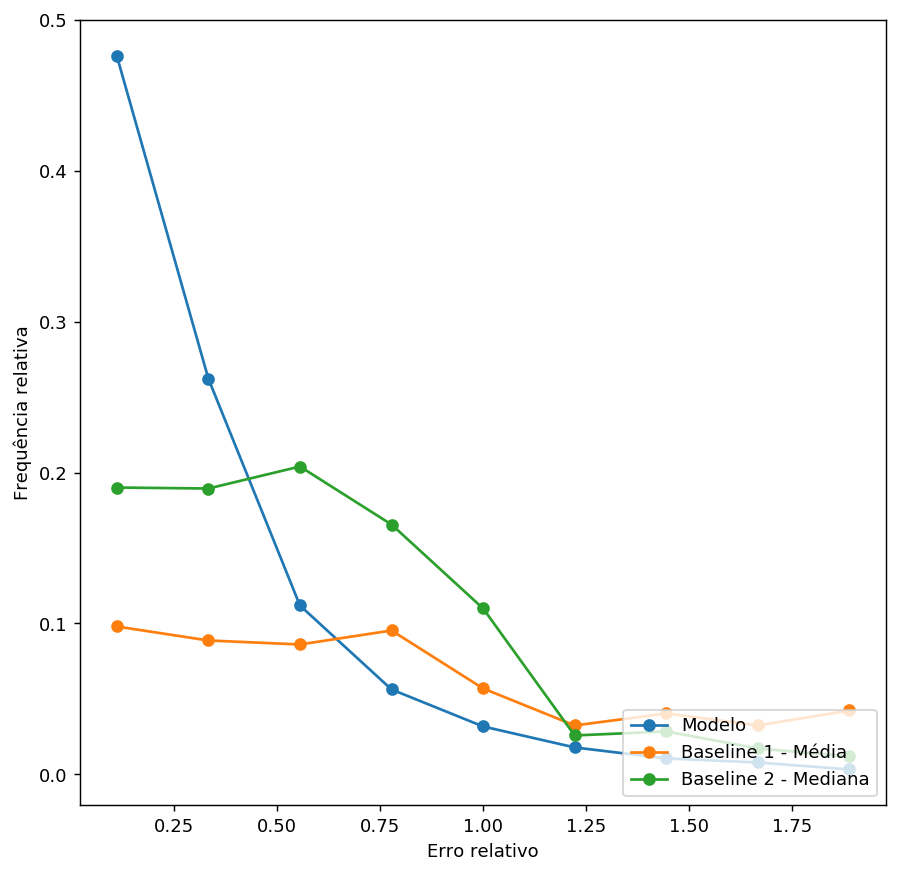

In [27]:
centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

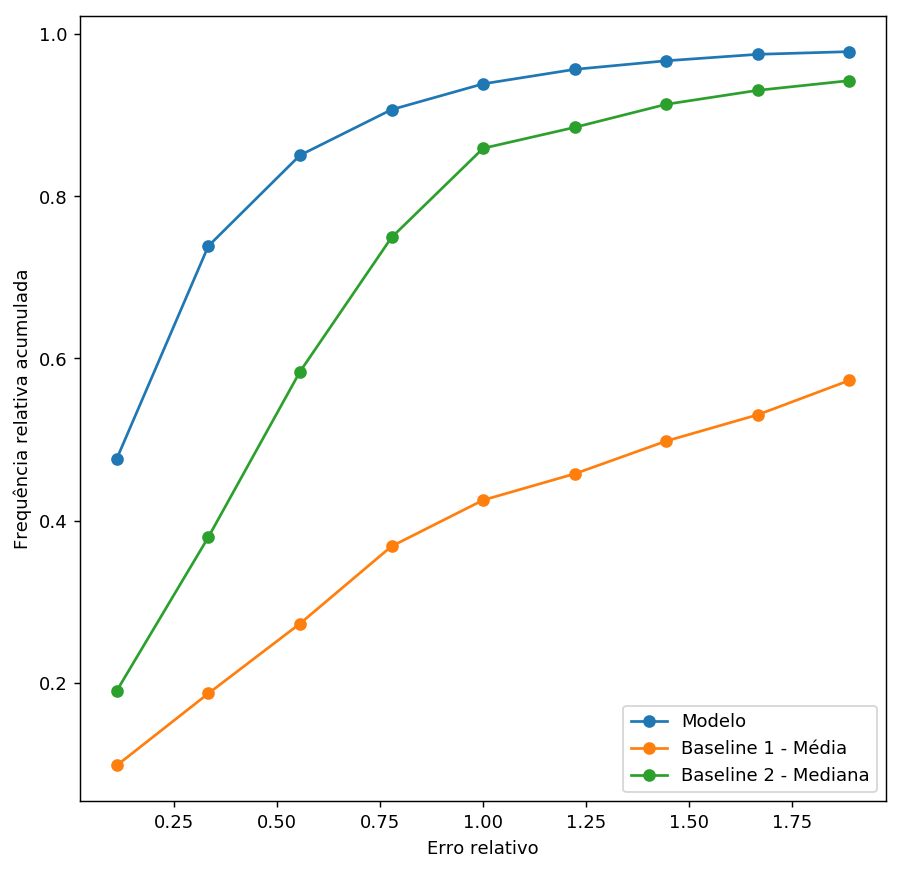

In [28]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median)

### Joined data summary

In [29]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,0.0,0.0,0.0,0.0,1510.0,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03,1510.000000,1510.000000
mean,59.361545,143.789183,112.248616,0.741674,2.316386,0.403365,136.796831,147.297967,1631.923179,NaN,NaN,NaN,NaN,1.0,147.297967,59171.455206,412.134095,13.168893,4.481998,16.008159,22.962326,2.300554,466.796522,7.881402e-03,8.864238,0.003630
std,145.163733,224.857462,258.282650,0.797891,2.558591,0.609481,206.171085,266.926786,1791.208439,NaN,NaN,NaN,NaN,0.0,266.926786,74644.781013,257.025083,28.363993,0.477658,2.889266,2.854166,1.231863,211.237820,2.099074e-02,18.280619,0.009817
min,0.014000,0.097967,0.005000,0.000087,0.000666,0.000333,10.281000,5.900000,1.000000,NaN,NaN,NaN,NaN,1.0,5.900000,53.000000,4.000000,1.000000,1.000000,2.600000,14.000000,0.200000,18.100000,8.902568e-08,1.000000,0.000000
25%,5.479750,71.413983,14.675000,0.280062,0.602302,0.106917,38.333750,35.900000,544.500000,NaN,NaN,NaN,NaN,1.0,35.900000,12459.250000,232.000000,3.000000,4.484431,14.000000,21.000000,1.400000,340.000000,7.283850e-06,1.000000,0.000000
50%,14.463500,102.397967,29.705000,0.581932,1.561481,0.237346,60.172000,57.505000,1235.500000,NaN,NaN,NaN,NaN,1.0,57.505000,37181.500000,352.500000,13.782918,4.484431,15.700000,22.900000,2.000000,470.363783,5.403469e-05,2.000000,0.000405
75%,40.462000,121.305467,69.577500,0.889611,3.103007,0.461248,136.153250,127.082500,1886.750000,NaN,NaN,NaN,NaN,1.0,127.082500,62762.500000,528.000000,13.782918,4.700000,17.400000,24.100000,2.975000,581.000000,1.999527e-03,8.000000,0.002917
85%,81.113100,132.087967,148.921000,1.058792,4.273555,0.661991,206.212850,206.426000,2209.950000,NaN,NaN,NaN,NaN,1.0,206.426000,100686.700000,656.000000,13.782918,5.000000,20.200000,26.200000,3.400000,703.000000,1.435704e-02,17.000000,0.005233
90%,136.496500,196.183033,285.976000,1.437274,5.243030,0.827261,335.133400,343.481000,3118.500000,NaN,NaN,NaN,NaN,1.0,343.481000,140539.700000,751.100000,14.000000,5.000000,20.800000,27.500000,3.800000,771.000000,2.849408e-02,24.000000,0.008100
95%,293.375450,450.850533,540.643500,2.125272,7.005324,1.222320,561.816500,598.148500,6468.650000,NaN,NaN,NaN,NaN,1.0,598.148500,234425.400000,898.200000,31.000000,5.000000,21.100000,27.800000,4.400000,880.000000,4.871952e-02,39.550000,0.017596


# Finished

In [30]:
finished_at = time.time()
duration = finished_at - started_at
print "Duração em segundos:"
print duration

Duração em segundos:
33.9983119965


<img src="files/image.png">